In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
df = pd.read_json('data/curated/all.ndjson', lines=True)
df = df.fillna(0)

In [2]:
df = pd.read_json('data/feature_extracted.ndjson', lines=True)
df = df.fillna(0)
print(len(df))
df = df[df['white_cpl'].apply(lambda x: len(x) > 0)]
df = df[df['black_cpl'].apply(lambda x: len(x) > 0)]
print(len(df))

df = df.dropna()

print(len(df))

2400
2395
2395


In [5]:
df["ECO"] = df["ECO"].astype('category')
df["Opening"] = df["Opening"].astype('category')
df["result"] = df["result"].astype('category')

df["mean_elos"] = df[['white_elo', 'black_elo']].mean(axis=1)
df["diff_elos"] = df['white_elo'] - df['black_elo']

df['white_mean'] = df['white_cpl'].apply(np.mean)
df['white_std'] = df['white_cpl'].apply(np.std)
df['white_min'] = df['white_cpl'].apply(np.min)
df['white_max'] = df['white_cpl'].apply(np.max)

df['black_mean'] = df['black_cpl'].apply(np.mean)
df['black_std'] = df['black_cpl'].apply(np.std)
df['black_min'] = df['black_cpl'].apply(np.min)
df['black_max'] = df['black_cpl'].apply(np.max)

c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jonat\anaconda3\envs\py310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


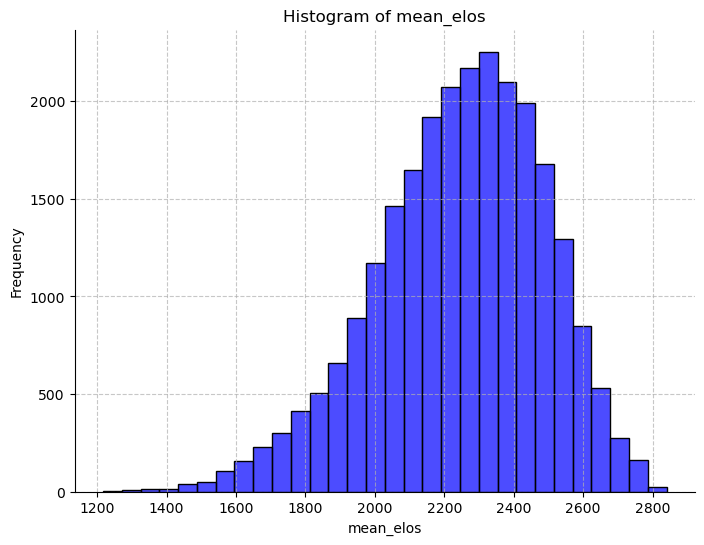

In [4]:
# Plotting the histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['mean_elos'].dropna(), bins=30, alpha = 0.7, kde=False, color='blue')

# Adding grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Removing the spines (lines around the plot)
sns.despine()

# Adding labels and title
plt.title('Histogram of mean_elos')
plt.xlabel('mean_elos')
plt.ylabel('Frequency')

plt.show()

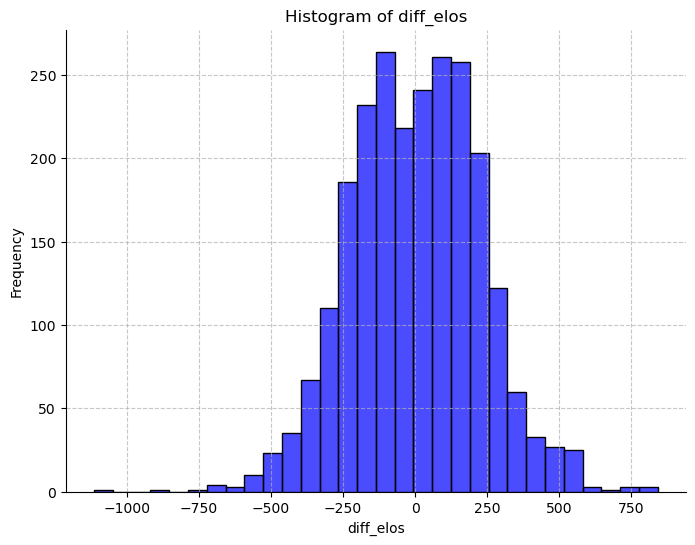

In [10]:
# Plotting the histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['diff_elos'].dropna(), bins=30, alpha = 0.7, kde=False, color='blue')

# Adding grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Removing the spines (lines around the plot)
sns.despine()

# Adding labels and title
plt.title('Histogram of diff_elos')
plt.xlabel('diff_elos')
plt.ylabel('Frequency')

plt.show()

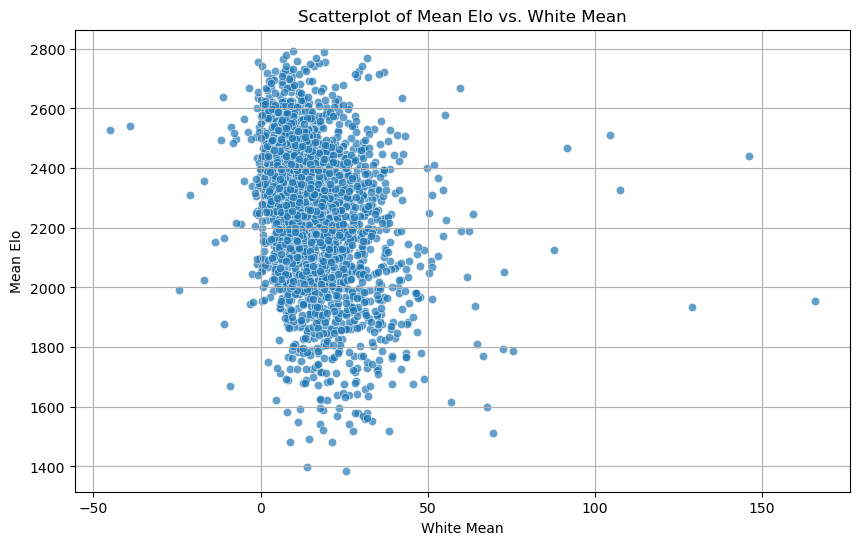

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and contains the necessary columns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='white_mean', y='mean_elos', data=df, alpha=0.7)
plt.title('Scatterplot of Mean Elo vs. White Mean')
plt.xlabel('White Mean')
plt.ylabel('Mean Elo')
plt.grid(True)
plt.show()

In [12]:
print(df["white_mean"])

0       13.250000
1       36.220000
2       23.222222
3        9.000000
4        4.884615
          ...    
2395    14.689655
2396    16.534884
2397    28.039216
2398    13.000000
2399    11.955556
Name: white_mean, Length: 2395, dtype: float64


In [3]:
df = pd.read_json("data/raw/stockfish_150.ndjson", lines = True)
df = df.fillna(0)

print(len(df))
df = df[df['white_cpl'].apply(lambda x: len(x) > 0)]
df = df[df['black_cpl'].apply(lambda x: len(x) > 0)]
print(len(df))

df["ECO"] = df["ECO"].astype('category')
df["Opening"] = df["Opening"].astype('category')
df["result"] = df["result"].astype('category')

df["mean_elos"] = df[['white_elo', 'black_elo']].mean(axis=1)
df["diff_elos"] = df['white_elo'] - df['black_elo']

df['white_mean'] = df['white_cpl'].apply(np.mean)
df['white_std'] = df['white_cpl'].apply(np.std)
df['white_min'] = df['white_cpl'].apply(np.min)
df['white_max'] = df['white_cpl'].apply(np.max)

df['black_mean'] = df['black_cpl'].apply(np.mean)
df['black_std'] = df['black_cpl'].apply(np.std)
df['black_min'] = df['black_cpl'].apply(np.min)
df['black_max'] = df['black_cpl'].apply(np.max)

df['stockfish_mean'] = df['stockfish_eval'].apply(np.mean)
df['stockfish_std'] = df['stockfish_eval'].apply(np.std)
df['stockfish_min'] = df['stockfish_eval'].apply(np.min)
df['stockfish_max'] = df['stockfish_eval'].apply(np.max)

1000
997


In [4]:
df.to_json('data/curated/stockfish_15.ndjson', orient='records', lines=True)

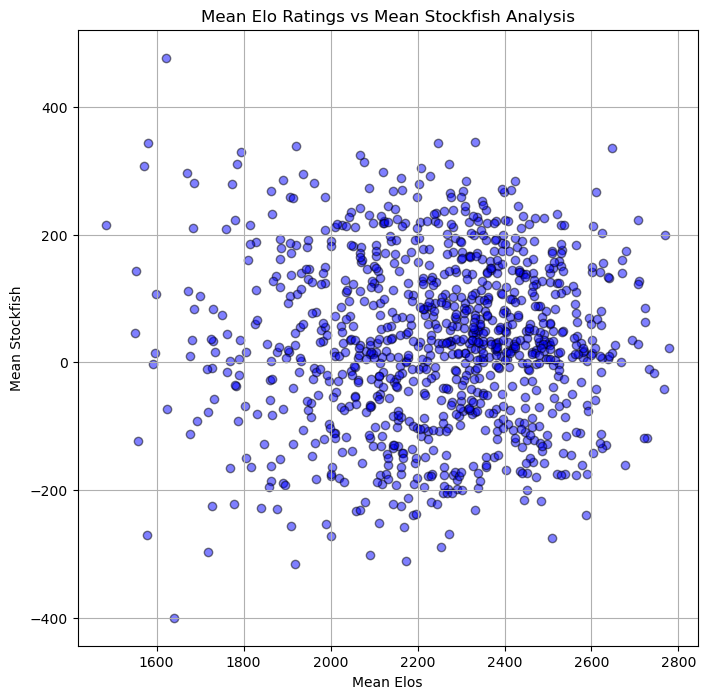

In [23]:
import matplotlib.pyplot as plt

# Assuming valid_y and pred are your actual and predicted values
# valid_y = [your actual values]
# pred = [your predicted values]

plt.figure(figsize=(8, 8))
plt.scatter(df["mean_elos"], (df["stockfish_mean"]), edgecolor='k', color='b', alpha=0.5)

# Adding a diagonal line to indicate perfect predictions
#plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')

# Adding titles and labels
plt.title('Mean Elo Ratings vs Mean Stockfish Analysis')
plt.xlabel('Mean Elos')
plt.ylabel('Mean Stockfish')

# Adding a grid for better readability
plt.grid(True)

# Show the plot
plt.show()